In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Retriving the csv file from the internal storage

In [2]:
df = pd.read_csv('archive/predictive_maintenance.csv')

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


Showing the heatmap for better understanding 

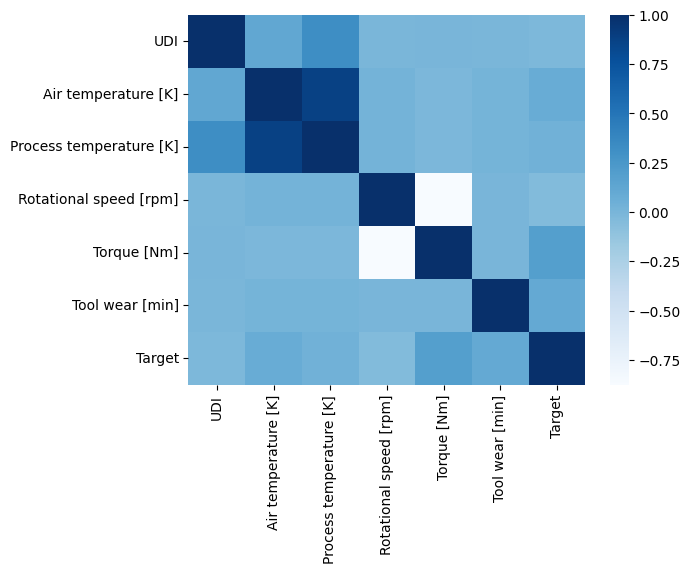

In [5]:
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# Display the heatmap of correlations
sns.heatmap(numeric_data.corr(), cmap="Blues")
plt.show()

Checking if the file contains any null values or not

In [6]:
null_values = df.isnull().sum()

In [7]:
null_values

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

For showing the column names and unique values on each table: 

In [8]:
for column in df.columns:
    unique_values_count = df[column].nunique()
    print("Number of unique values in column '{}': {}".format(column, unique_values_count))

Number of unique values in column 'UDI': 10000
Number of unique values in column 'Product ID': 10000
Number of unique values in column 'Type': 3
Number of unique values in column 'Air temperature [K]': 93
Number of unique values in column 'Process temperature [K]': 82
Number of unique values in column 'Rotational speed [rpm]': 941
Number of unique values in column 'Torque [Nm]': 577
Number of unique values in column 'Tool wear [min]': 246
Number of unique values in column 'Target': 2
Number of unique values in column 'Failure Type': 6


For showing the failure types in Failure Type column

In [9]:
failure_type_counts = df['Failure Type'].value_counts()

print("Unique failure types and their counts:")
print(failure_type_counts)

Unique failure types and their counts:
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


Plot the Failures in heatmap: 

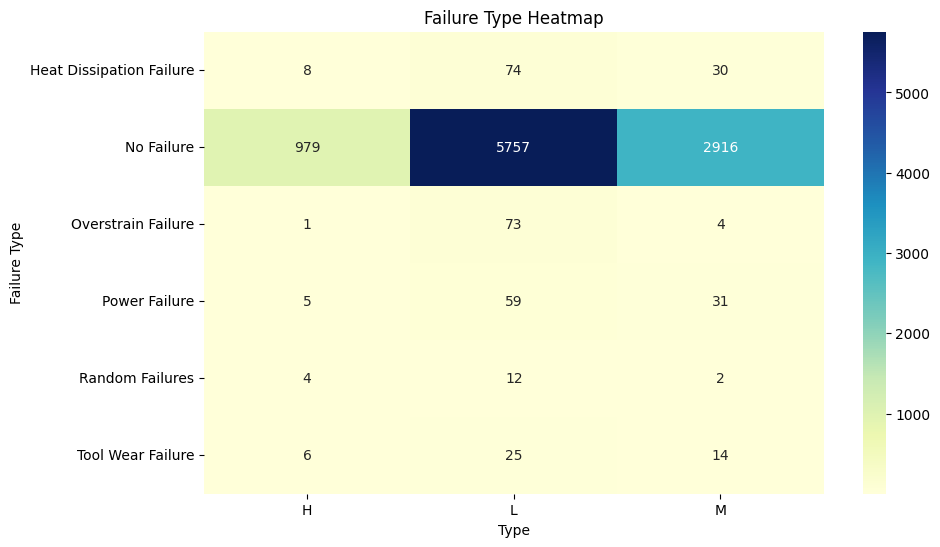

In [10]:
pivot_table = df.pivot_table(index='Failure Type', columns='Type', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Failure Type Heatmap')
plt.xlabel('Type')
plt.ylabel('Failure Type')
plt.show()

In [11]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


Renameing the columns: 

In [12]:
df.rename(columns={'Air temperature [K]': 'Air_temperature','Process temperature [K]': 'Process_temperature','Rotational speed [rpm]': 'Rotational_speed'}, inplace=True)

In [13]:
df.rename(columns={'Torque [Nm]': 'Torque','Tool wear [min]': 'Tool_wear'}, inplace=True)

In [14]:
df

,UDI,Product ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


Drop the unused column: 

In [15]:

columns_to_drop = ['UDI','Product ID','Target']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

In [16]:
df

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,No Failure
9996,H,298.9,308.4,1632,31.8,17,No Failure
9997,M,299.0,308.6,1645,33.4,22,No Failure
9998,H,299.0,308.7,1408,48.5,25,No Failure


<Axes: xlabel='Failure Type', ylabel='count'>

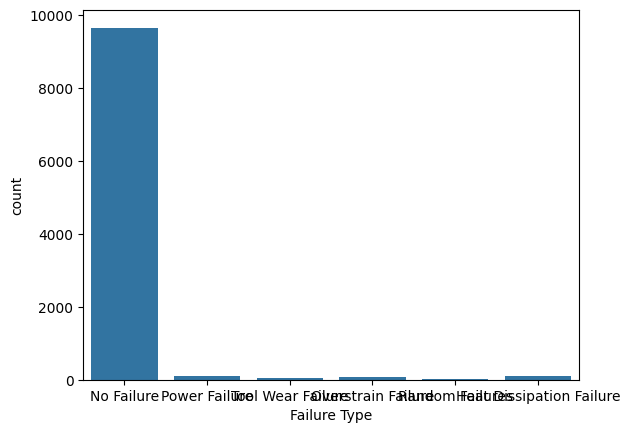

In [17]:
sns.countplot(x='Failure Type',data= df)

In [18]:
df.describe()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


Convert the Type column into 3 Binary tables: 

In [19]:
Type_binary = pd.get_dummies(df['Type']).astype("int")

Concat with the main file

In [20]:
df= pd.concat([df,Type_binary],axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air_temperature      10000 non-null  float64
 2   Process_temperature  10000 non-null  float64
 3   Rotational_speed     10000 non-null  int64  
 4   Torque               10000 non-null  float64
 5   Tool_wear            10000 non-null  int64  
 6   Failure Type         10000 non-null  object 
 7   H                    10000 non-null  int32  
 8   L                    10000 non-null  int32  
 9   M                    10000 non-null  int32  
dtypes: float64(3), int32(3), int64(2), object(2)
memory usage: 664.2+ KB


Then Drop the Type column from the file: 

In [22]:
df=df.drop(columns=['Type'])

Label Encoding for Failure Type column: 

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Failure Type'] = label_encoder.fit_transform(df['Failure Type'])

# Create a dictionary to map categories to numerical values
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the category mapping
print(category_mapping)

{'Heat Dissipation Failure': 0, 'No Failure': 1, 'Overstrain Failure': 2, 'Power Failure': 3, 'Random Failures': 4, 'Tool Wear Failure': 5}


For Understanding the data values: 

In [24]:
df.describe()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Failure Type,H,L,M
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,1.039000,0.100300,0.600000,0.299700
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.379069,0.300415,0.489922,0.458149
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,1.000000,0.000000,0.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,1.000000,0.000000,1.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,1.000000,0.000000,1.000000,1.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,5.000000,1.000000,1.000000,1.000000


In [25]:
import pickle

For split the data for training and testing :
And Scaled the data using minmax scaler: 

In [26]:
from sklearn.model_selection import train_test_split


X = df.drop('Failure Type', axis=1)
y = df['Failure Type']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [27]:
X_test[0]

array([0.30434783, 0.25925926, 0.23108265, 0.43269231, 0.47035573,
       0.        , 1.        , 0.        ])

Converting the numpy array into Dataframe : 

In [28]:
import pandas as pd

original_column_names = df.drop('Failure Type', axis=1).columns

X_train = pd.DataFrame(X_train, columns=original_column_names)
X_test = pd.DataFrame(X_test, columns=original_column_names)

For Save the processed data save the X_scaled numpy array into a data frame and then concat with y

In [29]:
import pandas as pd

original_column_names = df.drop('Failure Type', axis=1).columns

X_scaled = pd.DataFrame(X_scaled, columns=original_column_names)


In [69]:
processed_data = pd.concat([X_scaled, y], axis=1)

In [70]:
processed_data

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,H,L,M,Failure Type
0,0.304348,0.358025,0.222934,0.535714,0.000000,0.0,0.0,1.0,1
1,0.315217,0.370370,0.139697,0.583791,0.011858,0.0,1.0,0.0,1
2,0.304348,0.345679,0.192084,0.626374,0.019763,0.0,1.0,0.0,1
3,0.315217,0.358025,0.154249,0.490385,0.027668,0.0,1.0,0.0,1
4,0.315217,0.370370,0.139697,0.497253,0.035573,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...
9995,0.380435,0.333333,0.253783,0.353022,0.055336,0.0,0.0,1.0,1
9996,0.391304,0.333333,0.270081,0.384615,0.067194,1.0,0.0,0.0,1
9997,0.402174,0.358025,0.277648,0.406593,0.086957,0.0,0.0,1.0,1
9998,0.402174,0.370370,0.139697,0.614011,0.098814,1.0,0.0,0.0,1


In [72]:
file_path = "processed_data.csv"

# Save DataFrame to CSV
processed_data.to_csv(file_path, index=False)

print("Data saved successfully to", file_path)

Data saved successfully to processed_data.csv


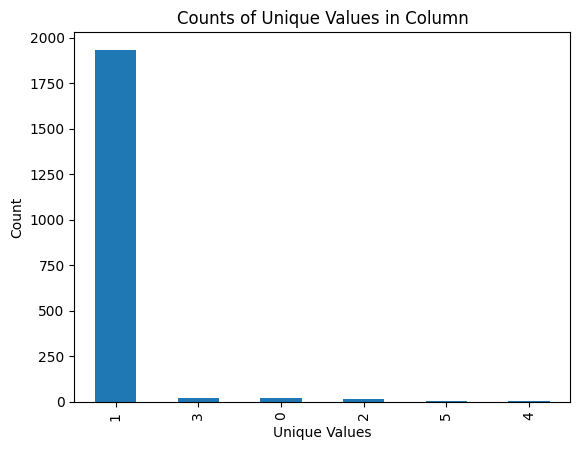

In [30]:
un=y_test.value_counts()
un.plot(kind='bar')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Counts of Unique Values in Column')

# Show the plot
plt.show()

Saved the Scaled data for future API use: 

In [31]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
    print('Scaler saved to scaler.pkl')

Scaler saved to scaler.pkl


In [32]:
y_train.sample(20)

4008    1
6712    1
5001    1
5096    1
4414    1
7297    1
970     1
4549    1
7044    1
279     1
529     1
8595    1
6632    1
3047    1
4082    1
6461    1
6413    1
6497    2
6488    1
677     1
Name: Failure Type, dtype: int32

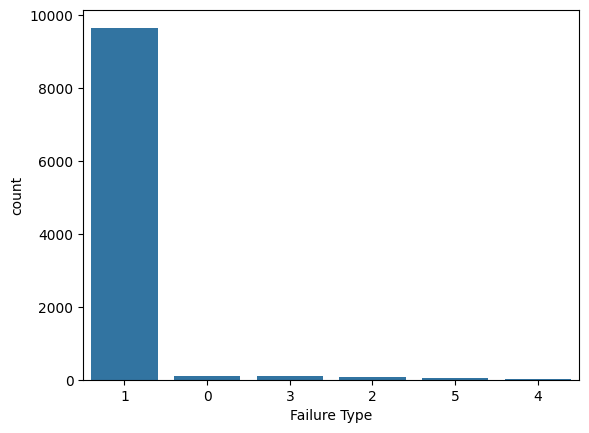

In [33]:
sns.countplot(x='Failure Type', data=df, order=y_train.value_counts().index)
plt.show()

Showing the heatmap again for the second time to understand the data better.

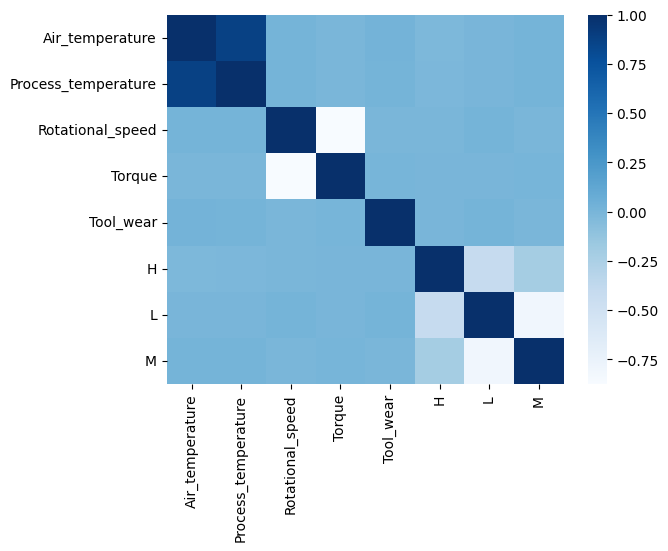

In [34]:
numeric_data = X_train.select_dtypes(include=['int64', 'float64'])

# Display the heatmap of correlations
sns.heatmap(numeric_data.corr(), cmap="Blues")
plt.show()

Data_resampling using smote sampling

In [35]:
y_train.value_counts()

Failure Type
1    7719
0      93
3      73
2      64
5      38
4      13
Name: count, dtype: int64

In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [37]:
type(y_train_resampled)

pandas.core.series.Series

For value counts in Y_train_resampled column: 

In [38]:
y_train_resampled.value_counts()

Failure Type
1    7719
3    7719
2    7719
0    7719
5    7719
4    7719
Name: count, dtype: int64

In [39]:
y_train_resampled.info()

<class 'pandas.core.series.Series'>
RangeIndex: 46314 entries, 0 to 46313
Series name: Failure Type
Non-Null Count  Dtype
--------------  -----
46314 non-null  int32
dtypes: int32(1)
memory usage: 181.0 KB


In [40]:
np.unique(y_train_resampled,return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([7719, 7719, 7719, 7719, 7719, 7719], dtype=int64))

Showing the Y_train_resampled in a plot

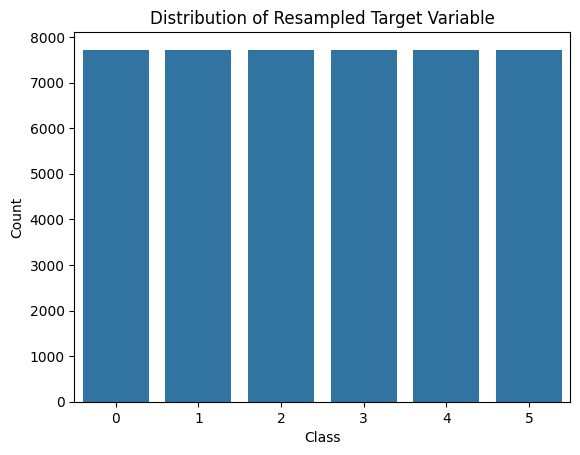

In [41]:

sns.countplot(x=y_train_resampled)
plt.title('Distribution of Resampled Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()



importing different types of model for model testing: 

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


Create a funtion for model fiting, print the Performence matrics result and return the predition after testing: 

In [43]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
   
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'Model: {model.__class__.__name__}')  
    print(f'Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    return y_pred

Train with logistic Regression: 

In [44]:
logiistic_model = LogisticRegression()
LR_y_pred=evaluate_model(logiistic_model, X_train_resampled, y_train_resampled, X_test, y_test)
LR_y_pred

Model: LogisticRegression
Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.79      0.27        19
           1       1.00      0.65      0.79      1933
           2       0.33      1.00      0.49        14
           3       0.29      0.91      0.44        22
           4       0.01      0.60      0.01         5
           5       0.05      1.00      0.10         7

    accuracy                           0.66      2000
   macro avg       0.31      0.82      0.35      2000
weighted avg       0.97      0.66      0.77      2000



c:\Users\BS-Test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 0, ..., 4, 5, 1])

Show the confution Matrix for the model trained on the training data and the test data on a plot: 

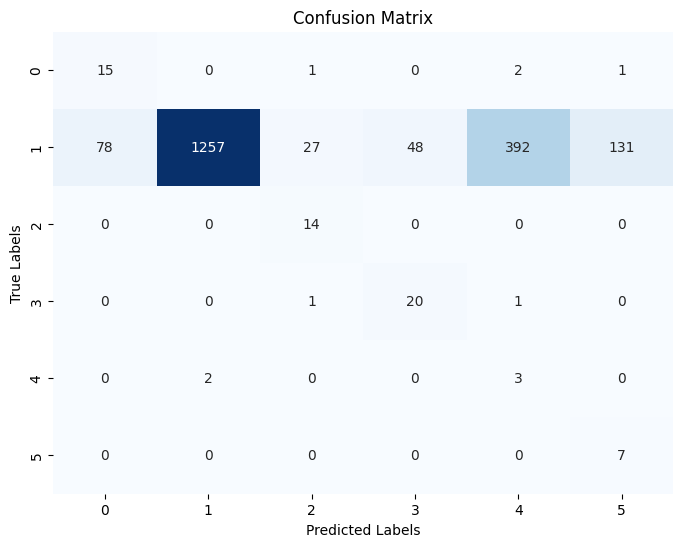

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, LR_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Training with Random forest Classifier model : 

In [46]:
Random_model = RandomForestClassifier()
R_forest_y_pred=evaluate_model(Random_model, X_train_resampled, y_train_resampled, X_test, y_test)
R_forest_y_pred

Model: RandomForestClassifier
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        19
           1       0.99      0.97      0.98      1933
           2       0.65      0.79      0.71        14
           3       0.84      0.95      0.89        22
           4       0.00      0.00      0.00         5
           5       0.10      0.43      0.16         7

    accuracy                           0.97      2000
   macro avg       0.56      0.66      0.59      2000
weighted avg       0.98      0.97      0.97      2000



array([1, 1, 1, ..., 1, 1, 1])

Show the confution Matrix for the model trained on the training data and the test data on a plot: 

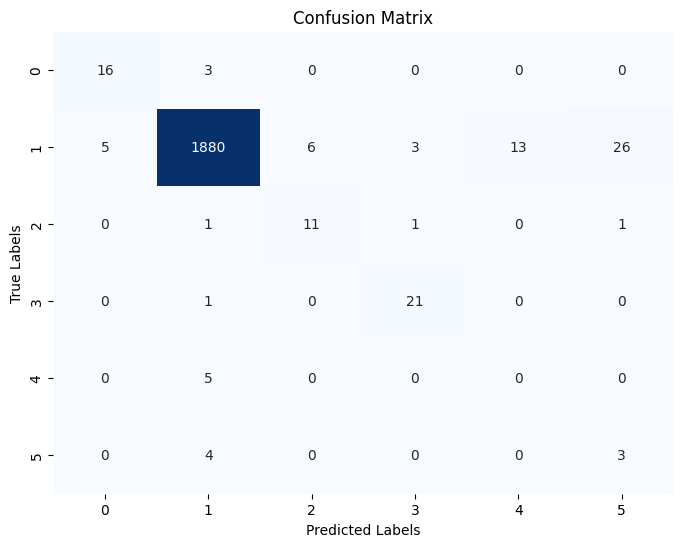

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, R_forest_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Model train with KNeighbors Classifier: 

In [48]:
knn_model = KNeighborsClassifier()
Knn_y_pred=evaluate_model(knn_model, X_train_resampled, y_train_resampled, X_test, y_test)
Knn_y_pred

Model: KNeighborsClassifier
Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.68      0.43        19
           1       0.99      0.90      0.94      1933
           2       0.50      0.93      0.65        14
           3       0.38      0.73      0.50        22
           4       0.01      0.20      0.03         5
           5       0.08      0.71      0.14         7

    accuracy                           0.89      2000
   macro avg       0.38      0.69      0.45      2000
weighted avg       0.97      0.89      0.93      2000



array([1, 1, 1, ..., 1, 1, 1])

Show the confution Matrix for the model trained on the training data and the test data on a plot: 

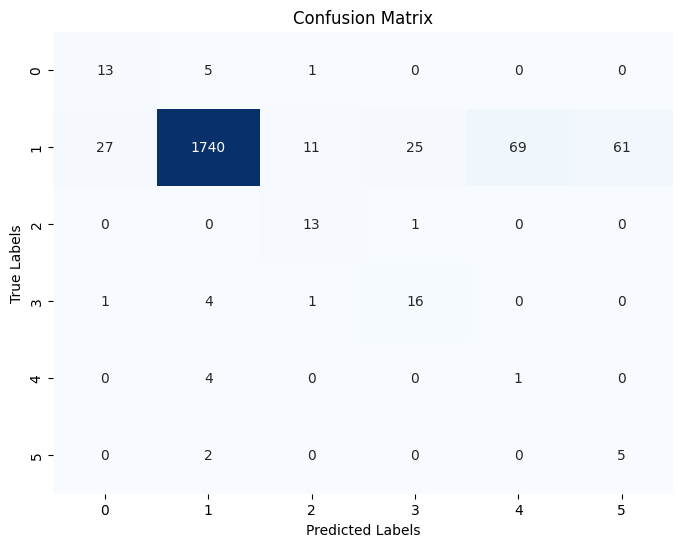

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, Knn_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Model Train with Decision Tree Classifier: 

In [50]:
Decision_tree_model = DecisionTreeClassifier()
Decision_y_pred=evaluate_model(Decision_tree_model, X_train_resampled, y_train_resampled, X_test, y_test)
Decision_y_pred

Model: DecisionTreeClassifier
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.84      0.71        19
           1       0.99      0.96      0.97      1933
           2       0.67      0.71      0.69        14
           3       0.66      0.95      0.78        22
           4       0.03      0.20      0.06         5
           5       0.06      0.29      0.09         7

    accuracy                           0.95      2000
   macro avg       0.50      0.66      0.55      2000
weighted avg       0.98      0.95      0.96      2000



array([1, 1, 1, ..., 1, 5, 1])

Model Train with XGBOOST model: 

In [51]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_Y_pred=evaluate_model(xgb_model, X_train_resampled, y_train_resampled, X_test, y_test)
xgb_Y_pred

Model: XGBClassifier
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       1.00      0.97      0.98      1933
           2       0.93      0.93      0.93        14
           3       0.92      1.00      0.96        22
           4       0.00      0.00      0.00         5
           5       0.13      0.57      0.22         7

    accuracy                           0.97      2000
   macro avg       0.65      0.74      0.67      2000
weighted avg       0.99      0.97      0.98      2000



array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Show the confution Matrix for the model trained on the training data and the test data on a plot: 

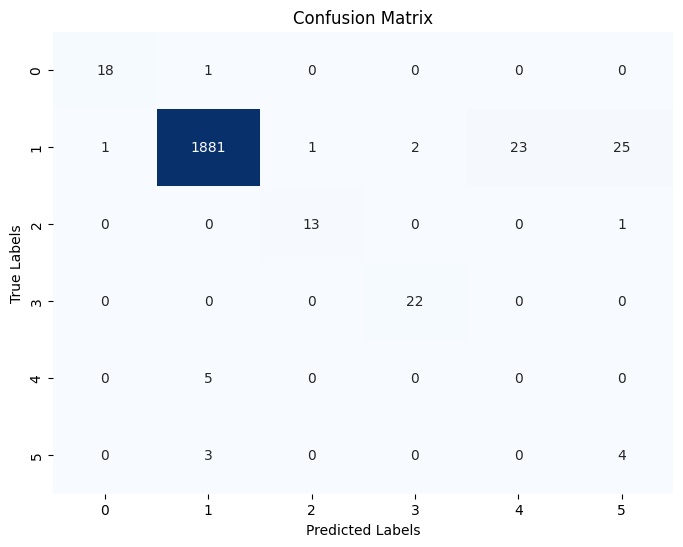

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, xgb_Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Import the pickle file for save the model as a pkl file

In [53]:
import pickle


In [54]:
model_path = 'Final_model.pkl'  # Specify a path and filename


In [55]:
# Assuming `model` is your trained model instance
with open(model_path, 'wb') as file:
    pickle.dump(xgb_model, file)
print(f'Model saved at {model_path}')


Model saved at Final_model.pkl


In [56]:


# Load the model from the file
with open(model_path, 'rb') as file:
    loaded_model = pickle.load(file)
print(f'Model loaded from {model_path}')


Model loaded from Final_model.pkl


In [57]:
Y_test_un = y_test.value_counts()
Y_test_un

Failure Type
1    1933
3      22
0      19
2      14
5       7
4       5
Name: count, dtype: int64

In [58]:
X_test

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,H,L,M
0,0.304348,0.259259,0.231083,0.432692,0.470356,0.0,1.0,0.0
1,0.760870,0.654321,0.147264,0.515110,0.719368,0.0,0.0,1.0
2,0.945652,0.864198,0.167637,0.651099,0.632411,0.0,0.0,1.0
3,0.771739,0.691358,0.130384,0.641484,0.201581,0.0,1.0,0.0
4,0.826087,0.851852,0.131548,0.585165,0.324111,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1995,0.782609,0.716049,0.283469,0.391484,0.561265,1.0,0.0,0.0
1996,0.326087,0.296296,0.243306,0.435440,0.000000,0.0,1.0,0.0
1997,0.597826,0.814815,0.155413,0.563187,0.529644,0.0,1.0,0.0
1998,0.423913,0.333333,0.290454,0.346154,0.786561,0.0,1.0,0.0


In [59]:
# X_test[X_test.index.isin(y_test[y_test == 4].index)]

In [60]:
# from sklearn.model_selection import train_test_split


# X = df.drop('Failure Type', axis=1)
# y = df['Failure Type']
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [61]:
# xgb_model.predict([X_test.loc[1124]]).item()

In [62]:
# loaded_model.predict([X_test.loc[1124]]).item()

In [63]:
# xgb_model.predict([[0.76086957, 0.64197531, 0.12165308, 0.59065934, 0.65612648,
#         0.        , 1.        , 0.        ]]).item()

In [64]:
loaded_model.predict([[0.76086957, 0.64197531, 0.12165308, 0.59065934, 0.65612648,
        0.        , 1.        , 0.        ]]).item()

0

Test the model with X_test value: 

In [65]:
df.loc[3760]

Air_temperature         302.3
Process_temperature     310.9
Rotational_speed       1377.0
Torque                   46.8
Tool_wear               166.0
Failure Type              0.0
H                         0.0
L                         1.0
M                         0.0
Name: 3760, dtype: float64

In [66]:
scaler.transform([df.drop('Failure Type', axis = 1).loc[3760]])

c:\Users\BS-Test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.76086957, 0.64197531, 0.12165308, 0.59065934, 0.65612648,
        0.        , 1.        , 0.        ]])